In [2]:
from tensorflow.keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

print('Dataset Loaded!')

17464789/17464789 [==============================] - 1s 0us/step
Dataset Loaded!


In [3]:
print("The length of the Training Dataset is ", len(XT))
print("The length of the Testing Dataset is ", len(Xt))

The length of the Training Dataset is  25000
The length of the Testing Dataset is  25000


In [4]:
print(XT[0])
print(len(XT[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [6]:
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

##
We will take the parameter maxlen = 500. Here, we are assuming that each review’s maximum length should be 500. 
If it is less than that, then add extra 0’s at the end of the array. 
We already saw how padding works in the previous chapter, so we will not discuss it here.

In [8]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

print("Padding Completed!")

Padding Completed!


In [9]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


In [10]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [11]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

print("Callbacks Created Successfully!")

Callbacks Created Successfully!


In [14]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10


2024-10-17 21:27:40.173101: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 19s 113ms/step - loss: 0.5748 - acc: 0.7059 - val_loss: 0.5436 - val_acc: 0.7296
Epoch 2/10
157/157 [==============================] - 19s 118ms/step - loss: 0.3736 - acc: 0.8490 - val_loss: 0.3989 - val_acc: 0.8388
Epoch 3/10
157/157 [==============================] - 17s 110ms/step - loss: 0.2688 - acc: 0.8981 - val_loss: 0.3585 - val_acc: 0.8422
Epoch 4/10
157/157 [==============================] - 18s 112ms/step - loss: 0.2024 - acc: 0.9255 - val_loss: 0.3616 - val_acc: 0.8598
Epoch 5/10
157/157 [==============================] - 18s 116ms/step - loss: 0.1396 - acc: 0.9510 - val_loss: 0.3997 - val_acc: 0.8440


In [18]:
acc

[0.7058500051498413,
 0.849049985408783,
 0.8980500102043152,
 0.9255499839782715,
 0.9509999752044678]

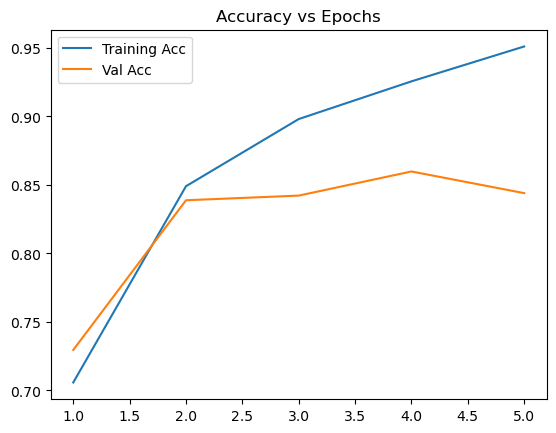

In [19]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,6)

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

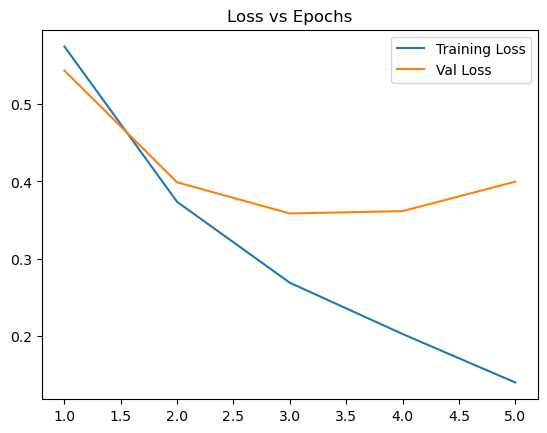

In [20]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,6)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

In [21]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 11s 13ms/step - loss: 0.4042 - acc: 0.8452


[0.404244989156723, 0.8452000021934509]

In [22]:
sent = "This movie is really bad . I do not like this movie because the direction was horrible ."
inp = []

# Get the word:integer mapping
word_idx = imdb.get_word_index()

# Convert each word to integer
for word in sent.split():
  if word in word_idx.keys():
    inp.append(word_idx[word])
  else:
    inp.append(1)

print(inp) 

# Perform the padding
final_input = sequence.pad_sequences([inp],maxlen=500)

# Finally predict the sentiment
model.predict(final_input)

[1, 17, 6, 63, 75, 1, 1, 78, 21, 37, 11, 17, 85, 1, 455, 13, 524, 1]
1/1 [==============================] - 0s 147ms/step


array([[0.33023855]], dtype=float32)